# MACHINE LEARNING: Assignment 7 to 11

<h1>2.1. Problem Statement: Machine Learning 7 </h1>

In this assignment, students will be using the K-nearest neighbors algorithm to predict how many points NBA players scored in the 2013-2014 season. 
 
A look at the data 
 
Before we dive into the algorithm, let’s take a look at our data. Each row in the data contains information on how a player performed in the 2013-2014 NBA season. 

In [33]:
import pandas
import numpy as np
with open("nba_2013.csv", 'r') as csvfile:
    nba_raw = pandas.read_csv(csvfile)
print(nba.columns.values) # The names of all the columns in the data.

['player' 'pos' 'age' 'bref_team_id' 'g' 'gs' 'mp' 'fg' 'fga' 'fg.' 'x3p'
 'x3pa' 'x3p.' 'x2p' 'x2pa' 'x2p.' 'efg.' 'ft' 'fta' 'ft.' 'orb' 'drb'
 'trb' 'ast' 'stl' 'blk' 'tov' 'pf' 'pts' 'season' 'season_end']


In [34]:
# Replace NaN values with zeros.
nba = nba_raw.fillna(0)

# Convert strings to NaN and drop.
nba = nba.convert_objects(convert_numeric=True).dropna()
    
# The names of the columns in the data.
print("nba.columns.values:", nba.columns.values)

nba.head(5)

nba.columns.values: ['player' 'pos' 'age' 'bref_team_id' 'g' 'gs' 'mp' 'fg' 'fga' 'fg.' 'x3p'
 'x3pa' 'x3p.' 'x2p' 'x2pa' 'x2p.' 'efg.' 'ft' 'fta' 'ft.' 'orb' 'drb'
 'trb' 'ast' 'stl' 'blk' 'tov' 'pf' 'pts' 'season' 'season_end']


,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


Use the principle of euclidean distance to find the most similar NBA players to Lebron James.

In [35]:
import math

selected_player = nba[nba["player"] == "LeBron James"].iloc[0]
distance_columns = ['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa',
 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast',
 'stl', 'blk', 'tov', 'pf', 'pts']

def euclidean_distance(row):
    inner_value = 0
    for k in distance_columns:
        inner_value += (row[k] - selected_player[k]) ** 2
    return math.sqrt(inner_value)

lebron_distance = nba.apply(euclidean_distance, axis=1)
print("lebron_distance[:5]:\n", lebron_distance[:5])

lebron_distance[:5]:
 0    3475.792868
1    3148.395020
2    3161.567361
3    1189.554979
4    3216.773098
dtype: float64


In [36]:
#Normalizing columns
nba_numeric = nba[distance_columns]
nba_numeric.head(5)

nba_normalized = (nba_numeric - nba_numeric.mean()) / nba_numeric.std()
nba_normalized.head(5)


,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,-0.835906,0.384886,-0.862207,-0.435088,-0.738401,-0.768505,0.325957,-0.700282,-0.716608,0.120520,...,-0.151926,0.260690,-0.129462,-0.013116,-0.645220,-0.468056,0.061410,-0.667650,0.226515,-0.734621
1,-1.550487,1.095711,-0.187863,-0.045011,-0.581271,-0.649215,0.667749,-0.778936,-0.829601,-1.390497,...,-0.522588,1.387883,0.187020,0.565852,-0.530733,0.020680,1.065446,-0.013760,1.363938,-0.534801
2,0.116868,-0.010016,-0.457600,-0.308035,-0.290291,-0.405214,0.833763,-0.778936,-0.829601,-1.390497,...,-0.250457,0.743773,0.283340,0.436083,-0.568895,-0.439307,0.385292,-0.524113,0.029924,-0.328603
3,0.355062,0.779789,1.599148,1.465144,1.577804,1.590172,0.238067,1.737992,1.430256,1.027130,...,0.575320,-0.383420,0.462221,0.216475,1.033919,-0.123066,-0.683520,1.182380,0.423107,1.729123
4,-0.359519,0.108454,0.149309,-0.319180,-0.331028,-0.475703,1.087666,-0.778936,-0.822068,-1.390497,...,0.673851,0.614951,0.138859,0.291341,-0.553630,-0.468056,0.709175,-0.141348,1.139262,-0.400878


# Finding the nearest neighbor

In [37]:
from scipy.spatial import distance

# Fill in NA values in nba_normalized.
nba_normalized.fillna(0, inplace=True)

# Find the normalized vector for lebron james.
lebron_normalized = nba_normalized[nba["player"] == "LeBron James"]

# Find the distance between lebron james and everyone else.
euclidean_distances = nba_normalized.apply(lambda row: distance.euclidean(row, lebron_normalized), axis=1)
distance_frame = pandas.DataFrame(data={"dist": euclidean_distances, "idx": euclidean_distances.index})
distance_frame.sort_values("dist", inplace=True)

second_smallest = distance_frame.iloc[1]["idx"]

most_similar_to_lebron = nba.loc[int(second_smallest)]["player"]
print("most_similar_to_lebron:", most_similar_to_lebron)

most_similar_to_lebron: Carmelo Anthony


# Generating training and testing sets

In [38]:
import random
from numpy.random import permutation

# Randomly shuffle the index of nba.
random_indices = permutation(nba.index)

# Set a cutoff for how many items we want in the test set (in this case 1/3 of the items)
test_cutoff = math.floor(len(nba)/3)

# Generate the test set by taking the first 1/3 of the randomly shuffled indices.
test = nba.loc[random_indices[1:test_cutoff]]

# Generate the train set with the rest of the data.
train = nba.loc[random_indices[test_cutoff:]]

# Using sklearn for k nearest neighbors

In [39]:
#We are going to use k-nearest neighbors available in scikit-learn 
#and Regressor according to continuous values we are goint to predict on
# The columns that we will be making predictions with.
x_columns = ['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf']
# The column that we want to predict.
y_column = ["pts"]

from sklearn.neighbors import KNeighborsRegressor
# Create the knn model.
# Look at the five closest neighbors.
knn = KNeighborsRegressor(n_neighbors=5)
# Fit the model on the training data.
knn.fit(train[x_columns], train[y_column])
# Make point predictions on the test set using the fit model.
predictions = knn.predict(test[x_columns])

# Computing error

In [40]:
#Now that we know our point predictions, we can compute the error involved with our predictions.
#We can compute mean squared error : mse
actual = test[y_column]

mse = (((predictions - actual) ** 2).sum()) / len(predictions)

print("actual[:20]:\n", actual[:20])
print("mse:", mse)

actual[:20]:
       pts
433   760
379   350
71    895
334   349
50    378
..    ...
237  1245
277  2010
223    28
240     0
410    18

[20 rows x 1 columns]
mse: pts    4639.131572
dtype: float64


<h1>2.2. Problem Statement: Machine Learning 8</h1>

In this assignment students have to find the frequency of words in a webpage. User can use urllib and BeautifulSoup to extract text from webpage.

In [41]:
from bs4 import BeautifulSoup 
import urllib.request 
import nltk 

response = urllib.request.urlopen('http://php.net/') 
html = response.read() 
soup = BeautifulSoup(html,"html5lib")

In [42]:
text = soup.get_text(strip=True) 
tokens = [t for t in text.split()] 
freq = nltk.FreqDist(tokens) 
for key,val in freq.items(): 
    print (str(key) + ':' + str(val))

PHP::1
Hypertext:1
PreprocessorDownloadsDocumentationGet:1
InvolvedHelpGetting:1
StartedIntroductionA:1
simple:1
tutorialLanguage:1
ReferenceBasic:1
syntaxTypesVariablesConstantsExpressionsOperatorsControl:1
StructuresFunctionsClasses:1
and:102
ObjectsNamespacesErrorsExceptionsGeneratorsReferences:1
ExplainedPredefined:1
VariablesPredefined:1
ExceptionsPredefined:1
Interfaces:1
ClassesContext:1
options:1
parametersSupported:1
Protocols:1
WrappersSecurityIntroductionGeneral:1
considerationsInstalled:1
as:2
CGI:1
binaryInstalled:1
an:14
Apache:1
moduleSession:1
SecurityFilesystem:1
SecurityDatabase:1
SecurityError:1
ReportingUsing:1
Register:1
GlobalsUser:1
Submitted:1
DataMagic:1
QuotesHiding:1
PHPKeeping:1
CurrentFeaturesHTTP:1
authentication:1
with:3
PHPCookiesSessionsDealing:1
XFormsHandling:1
file:1
uploadsUsing:1
remote:1
filesConnection:1
handlingPersistent:1
Database:1
ConnectionsSafe:1
ModeCommand:1
line:1
usageGarbage:1
CollectionDTrace:1
Dynamic:1
TracingFunction:1
ReferenceAf

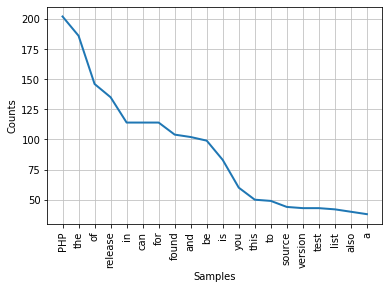

In [43]:
freq.plot(20,cumulative=False)

We can see that PHP is the most frequent token.
From the graph, you can be sure that this article is talking about PHP. Great! There are some words like "the," "of," "a," "an," and so on. These words are stop words. Generally, stop words should be removed to prevent them from affecting our results.

# Remove Stop Words Using NLTK

In [44]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
#clean the tokens before plotting the graph
clean_tokens = tokens[:] 
sr = stopwords.words('english')
for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)

In [47]:
from bs4 import BeautifulSoup 
import urllib.request 
import nltk 
from nltk.corpus import stopwords 
response = urllib.request.urlopen('http://php.net/') 
html = response.read() 
soup = BeautifulSoup(html,"html5lib") 
text = soup.get_text(strip=True) 
tokens = [t for t in text.split()] 
clean_tokens = tokens[:] 
sr = stopwords.words('english') 
for token in tokens: 
    if token in stopwords.words('english'): 
        clean_tokens.remove(token) 
freq = nltk.FreqDist(clean_tokens) 
for key,val in freq.items(): 
    print (str(key) + ':' + str(val))

PHP::1
Hypertext:1
PreprocessorDownloadsDocumentationGet:1
InvolvedHelpGetting:1
StartedIntroductionA:1
simple:1
tutorialLanguage:1
ReferenceBasic:1
syntaxTypesVariablesConstantsExpressionsOperatorsControl:1
StructuresFunctionsClasses:1
ObjectsNamespacesErrorsExceptionsGeneratorsReferences:1
ExplainedPredefined:1
VariablesPredefined:1
ExceptionsPredefined:1
Interfaces:1
ClassesContext:1
options:1
parametersSupported:1
Protocols:1
WrappersSecurityIntroductionGeneral:1
considerationsInstalled:1
CGI:1
binaryInstalled:1
Apache:1
moduleSession:1
SecurityFilesystem:1
SecurityDatabase:1
SecurityError:1
ReportingUsing:1
Register:1
GlobalsUser:1
Submitted:1
DataMagic:1
QuotesHiding:1
PHPKeeping:1
CurrentFeaturesHTTP:1
authentication:1
PHPCookiesSessionsDealing:1
XFormsHandling:1
file:1
uploadsUsing:1
remote:1
filesConnection:1
handlingPersistent:1
Database:1
ConnectionsSafe:1
ModeCommand:1
line:1
usageGarbage:1
CollectionDTrace:1
Dynamic:1
TracingFunction:1
ReferenceAffecting:1
PHP's:1
Behaviou

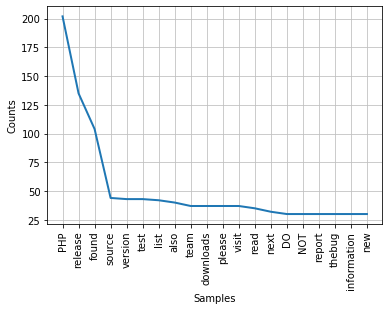

In [48]:
freq.plot(20,cumulative=False)

As you can see, no stop words on the count.

<h1>2.3. Problem Statement: Machine Learning 9</h1>

In this assignment students have to compress racoon grey scale image into 5 clusters. In the end, visualize both raw and compressed image and look for quality difference. 
 
The raw image is available in spicy.misc package with the name face. 

In [49]:
import numpy as np 
from sklearn import cluster, datasets 
from scipy import misc 

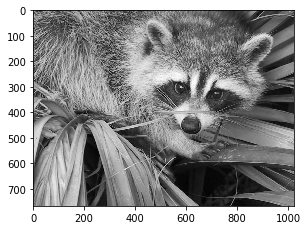

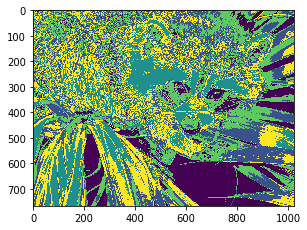

In [50]:
import numpy as np
from sklearn.cluster import KMeans
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline

# Visualize the gray scale image

f = scipy.misc.face(gray=True)
plt.figure(figsize=(10, 3.6))
plt.imshow(f, cmap=plt.cm.gray)
plt.show()

# Compressing the gray scale image into 5 clusters

rows = f.shape[0]
cols = f.shape[1]

#print(rows,cols)

image = f.reshape(rows*cols,1)
kmeans = KMeans(n_clusters = 5)
kmeans.fit(image)

clusters = np.asarray(kmeans.cluster_centers_) 
labels = np.asarray(kmeans.labels_)  
labels = labels.reshape(rows,cols); 
 
#np.save('codebook_racoon.npy',clusters)
plt.imsave('compressed_racoon.png',labels);

# Visualize the compressed image

image = plt.imread('compressed_racoon.png')
plt.figure(figsize=(10, 3.6))
plt.imshow(image)
plt.show()

<h1>2.4. Problem Statement: Machine Learning 10 </h1>

In this assignment students have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and colour  each data point with specific class. 

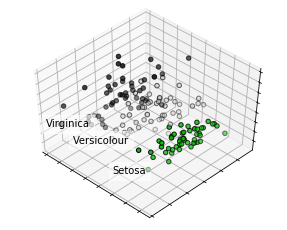

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

<h1>2.5. Problem Statement: Machine Learning 11 </h1>

In this assignment students have to make ARIMA model over shampoo sales data and check the MSE between predicted and actual value. 
 
Student can download data in .csv format from the following link: 
 
https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-threeyear-period#!ds =22r0&display=line 

In [52]:
import pandas as pd
from pandas import datetime 
from matplotlib import pyplot 
from statsmodels.tsa.arima_model import ARIMA 
from sklearn.metrics import mean_squared_error

In [53]:
def parser(x): 
    return datetime.strptime('190'+x, '%Y-%m')

In [54]:
series=pd.read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


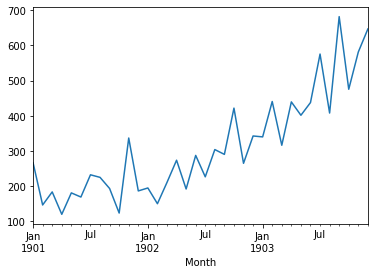

In [55]:
print(series.head())
series.plot()
pyplot.show()

In [56]:
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Tue, 18 Feb 2020   AIC                            406.340
Time:                        15:31:50   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

In [57]:
X = series.values
X

array([266. , 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8,
       122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287. ,
       226. , 303.6, 289.9, 421.6, 264.5, 342.3, 339.7, 440.4, 315.9,
       439.3, 401.3, 437.4, 575.5, 407.6, 682. , 475.3, 581.3, 646.9])

In [58]:
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

In [59]:
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=349.117692, expected=342.300000
predicted=306.512866, expected=339.700000
predicted=387.376465, expected=440.400000
predicted=348.154144, expected=315.900000
predicted=386.308801, expected=439.300000
predicted=356.082088, expected=401.300000
predicted=446.379471, expected=437.400000
predicted=394.737288, expected=575.500000
predicted=434.915413, expected=407.600000
predicted=507.923472, expected=682.000000
predicted=435.482761, expected=475.300000
predicted=652.743901, expected=581.300000
predicted=546.343472, expected=646.900000
Test MSE: 6958.326


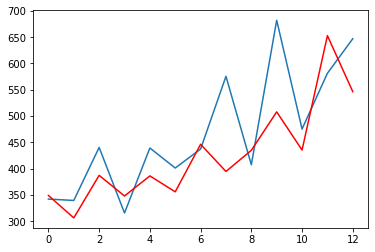

In [60]:
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()